## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Upload Data Base

In [2]:
df_ord = pd.read_csv(r'base_orders.csv')

In [3]:
df_ord.shape

(1066692, 11)

In [4]:
df_ord.columns

Index(['ORD_ORDER_ID', 'ITE_ITEM_ID', 'CTLG_PROD_ID', 'ITE_BASE_CURRENT_PRICE',
       'active_item', 'flag_bad_user', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final'],
      dtype='object')

In [5]:
df_ord.head()

,ORD_ORDER_ID,ITE_ITEM_ID,CTLG_PROD_ID,ITE_BASE_CURRENT_PRICE,active_item,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final
0,4676469514,1914612989,15275559,52.54,1,0,1,0,0,0.0,0.0
1,4616865235,1881507066,15565384,27.95,0,0,0,0,0,0.0,0.0
2,4668133974,1689031432,15984003,54.29,0,0,1,0,0,0.0,0.0
3,4614772497,1855437976,8803934,137.62,0,0,1,0,0,0.0,0.0
4,4640967182,1743613950,15786116,25.04,0,0,1,0,0,0.0,0.0


In [6]:
df_ord.dtypes

ORD_ORDER_ID                int64
ITE_ITEM_ID                 int64
CTLG_PROD_ID                int64
ITE_BASE_CURRENT_PRICE    float64
active_item                 int64
flag_bad_user               int64
is_buybox                   int64
has_bpp                     int64
has_claim_seller            int64
is_refund                 float64
bpp_cashout_final         float64
dtype: object

## Describe of the prices of the products

In [7]:
df_prod = df_ord[['CTLG_PROD_ID','ITE_ITEM_ID','ITE_BASE_CURRENT_PRICE']]

In [8]:
df_prod.sample(5)

,CTLG_PROD_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE
290833,15960724,1690827563,292.75
280886,17450178,1767181074,33.07
321987,6510678,1475246738,312.48
100307,15203607,1563557479,75.39
778513,9151143,1664330751,13.67


In [9]:
df_prod.shape

(1066692, 3)

In [10]:
gb=df_prod.groupby(['CTLG_PROD_ID'])
df_des=gb['ITE_BASE_CURRENT_PRICE'].describe()
df_des

,count,mean,std,min,25%,50%,75%,max
CTLG_PROD_ID,,,,,,,,
633,5.0,41.338000,4.864187,37.50,37.50,38.86,44.480,48.35
5020,21.0,45.085238,3.550147,42.95,42.95,44.90,45.380,59.86
802407,1.0,43.340000,NaN,43.34,43.34,43.34,43.340,43.34
802447,3.0,18.766667,7.990528,9.54,16.46,23.38,23.380,23.38
802465,75.0,99.757600,64.547883,5.72,7.79,137.79,140.665,204.94
...,...,...,...,...,...,...,...,...
18326224,1.0,81.160000,NaN,81.16,81.16,81.16,81.160,81.16
18337312,1.0,722.410000,NaN,722.41,722.41,722.41,722.410,722.41
18339643,3.0,186.510000,0.000000,186.51,186.51,186.51,186.510,186.51


## Drop rows with NaN std

In [11]:
countNaN = df_des['std'].isna().sum()
countNaN

1964

In [12]:
df_des.dropna(subset = ['std'], inplace=True)

In [13]:
countNaN = df_des['std'].isna().sum()
countNaN

0

## Reset the index

In [14]:
df_des=df_des.reset_index()

In [15]:
df_des.head()

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max
0,633,5.0,41.338000,4.864187,37.50,37.50,38.86,44.480,48.35
1,5020,21.0,45.085238,3.550147,42.95,42.95,44.90,45.380,59.86
2,802447,3.0,18.766667,7.990528,9.54,16.46,23.38,23.380,23.38
3,802465,75.0,99.757600,64.547883,5.72,7.79,137.79,140.665,204.94
4,802499,3.0,47.350000,0.571577,47.02,47.02,47.02,47.515,48.01


In [16]:
df_des.shape

(11913, 9)

## Join the DFs by Product ID

In [17]:
df = pd.merge(left = df_des, right = df_ord,
                how = 'inner',
                left_on='CTLG_PROD_ID', right_on='CTLG_PROD_ID')

In [18]:
df.shape

(1064728, 19)

In [19]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'active_item', 'flag_bad_user', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final'],
      dtype='object')

In [20]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,active_item,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final
308509,13520200,66.0,7.018030,3.140017,5.46,5.49,5.49,7.4750,16.21,4616192530,1795955962,5.49,0,0,1,0,0,0.0,0.0
1017075,17459955,738.0,293.878577,76.850291,253.69,271.27,275.72,284.8725,977.00,4641024245,1901232950,278.28,0,0,1,0,0,0.0,0.0
399693,14907021,121.0,84.362231,11.563470,77.96,77.96,77.96,87.0100,136.51,4668850320,1731788361,87.01,0,0,1,0,0,0.0,0.0
476618,15279526,310.0,18.192194,3.637957,12.77,15.41,18.85,20.9900,39.26,4678223982,1551291415,22.44,1,0,1,0,0,0.0,0.0
1003212,17449008,1311.0,167.026049,25.041992,118.86,149.65,149.65,192.1400,221.24,4636947000,1854168280,182.44,1,0,1,0,0,0.0,0.0


## Bad orders

In [21]:
df['bad_order'] = df.apply(lambda x: 1 if x['flag_bad_user'] == 1 or x['has_bpp'] == 1 or x['has_claim_seller'] == 1 or x['is_refund'] == 1 or x['bpp_cashout_final'] > 0 else 0, axis=1)


In [22]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,active_item,flag_bad_user,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order
1000585,17449007,3609.0,150.463339,19.044650,133.25,140.62,145.76,146.48,209.47,4609944963,1854277550,145.76,1,0,1,0,0,0.0,0.0,0
769131,15984002,3193.0,68.129154,37.077635,31.78,59.57,62.49,66.01,615.19,4663120631,1781907251,63.86,0,0,0,0,0,0.0,0.0,0
44394,6091068,127.0,41.269528,6.454820,30.08,40.21,40.21,40.21,72.16,4639352391,1659644162,40.21,1,0,1,0,0,0.0,0.0,0
241871,10137123,463.0,33.802700,1.432367,30.43,33.46,33.46,34.82,42.34,4676377073,1926714812,34.82,0,0,0,0,0,0.0,0.0,0
896241,16212510,1523.0,71.079041,47.854213,59.24,64.02,64.25,68.34,501.92,4668945545,1875610254,64.25,0,0,1,0,0,0.0,0.0,0


In [23]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'active_item', 'flag_bad_user', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final', 'bad_order'],
      dtype='object')

# Base on the Price_Range

## Create columns flag low_price for those items with price below the 25%

In [24]:
df['Low25_Price'] = df.apply(lambda x: 1 if x['25%'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create columns flag middle_price for items with price below the 75% and over the  25%

In [25]:
df['Middle_Price'] = df.apply(lambda x: 1 if x['75%'] >= x['ITE_BASE_CURRENT_PRICE'] and x['25%'] <= x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)


## Create column flag high_price for those items with price over the 75%

In [26]:
df['High75_Price'] = df.apply(lambda x: 1 if x['75%'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag price_range

In [27]:
df['Price_Range'] = df.apply(lambda x:'low_25' if x['Low25_Price']== 1 else('high_75' if  x['High75_Price']==1  else 'middle'),axis=1)


In [28]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'active_item', 'flag_bad_user', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final', 'bad_order',
       'Low25_Price', 'Middle_Price', 'High75_Price', 'Price_Range'],
      dtype='object')

In [29]:
df.sample(5)

,CTLG_PROD_ID,count,mean,std,min,25%,50%,75%,max,ORD_ORDER_ID,...,is_buybox,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order,Low25_Price,Middle_Price,High75_Price,Price_Range
802789,16039858,588.0,73.069796,6.583838,68.16,69.86,69.86,77.14,128.90,4635231544,...,1,0,0,0.0,0.0,0,0,0,1,high_75
374359,14690364,822.0,176.198114,6.130518,142.70,173.87,174.95,175.57,228.53,4680375137,...,0,0,0,0.0,0.0,0,0,0,1,high_75
104667,6331498,142.0,30.594648,0.994285,27.75,30.43,30.43,30.43,36.71,4663308758,...,1,0,0,0.0,0.0,0,1,0,0,low_25
1056977,17966323,21.0,9.481429,0.856582,8.77,8.77,9.32,9.32,11.13,4671304709,...,1,0,0,0.0,0.0,0,0,0,1,high_75
1019118,17459957,883.0,307.436727,328.341138,246.55,275.62,283.42,297.74,9870.00,4669101769,...,1,1,1,1.0,0.0,1,0,1,0,middle


## Distribution Bad Orders

In [30]:
df_1=df[['Price_Range','bad_order','ORD_ORDER_ID']]

In [31]:
gb1=df_1.groupby(['Price_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,142307,166090,85.7
1,high_75,1,23783,166090,14.3
2,low_25,0,125406,153049,81.9
3,low_25,1,27643,153049,18.1
4,middle,0,653634,745589,87.7
5,middle,1,91955,745589,12.3


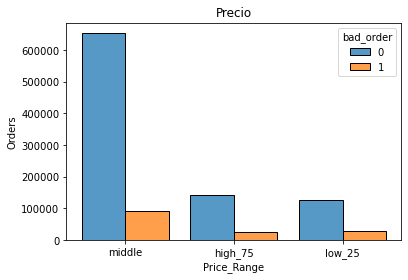

In [32]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="bad_order",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Bad Users

In [33]:
df_1=df[['Price_Range','flag_bad_user','ORD_ORDER_ID']]

In [34]:
gb1=df_1.groupby(['Price_Range','flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,flag_bad_user,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,160134,166090,96.4
1,high_75,1,5956,166090,3.6
2,low_25,0,145748,153049,95.2
3,low_25,1,7301,153049,4.8
4,middle,0,723483,745589,97.0
5,middle,1,22106,745589,3.0


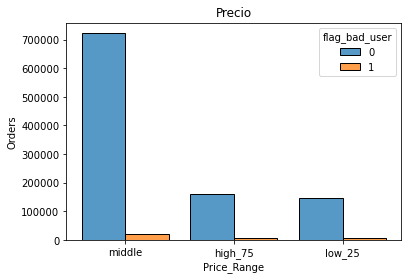

In [35]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="flag_bad_user",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has CashOut

In [36]:
df_1=df[['Price_Range','bpp_cashout_final','ORD_ORDER_ID']]
df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)
df_1=df_1[['Price_Range','has_co','ORD_ORDER_ID']]

<ipython-input-36-239d2c268fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)


In [37]:
gb1=df_1.groupby(['Price_Range','has_co']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,has_co,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,165194,166090,99.5
1,high_75,1,896,166090,0.5
2,low_25,0,151822,153049,99.2
3,low_25,1,1227,153049,0.8
4,middle,0,741545,745589,99.5
5,middle,1,4044,745589,0.5


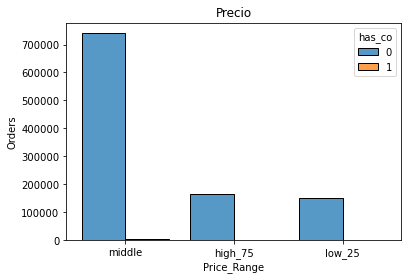

In [38]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="has_co",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has Claim

In [39]:
df_1=df[['Price_Range','has_claim_seller','ORD_ORDER_ID']]

In [40]:
gb1=df_1.groupby(['Price_Range','has_claim_seller']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,has_claim_seller,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0,150687,166090,90.7
1,high_75,1,15403,166090,9.3
2,low_25,0,135549,153049,88.6
3,low_25,1,17500,153049,11.4
4,middle,0,684682,745589,91.8
5,middle,1,60907,745589,8.2


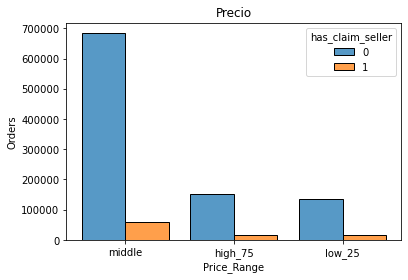

In [41]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="has_claim_seller",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution is Refund

In [42]:
df_1=df[['Price_Range','is_refund','ORD_ORDER_ID']]

In [43]:
gb1=df_1.groupby(['Price_Range','is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['Price_Range','ORD_ORDER_ID']].groupby(['Price_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['Price_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='Price_Range', right_on='Price_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,Price_Range,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_75,0.0,150774,166086,90.8
1,high_75,1.0,15312,166086,9.2
2,low_25,0.0,134901,153041,88.1
3,low_25,1.0,18140,153041,11.9
4,middle,0.0,688048,745584,92.3
5,middle,1.0,57536,745584,7.7


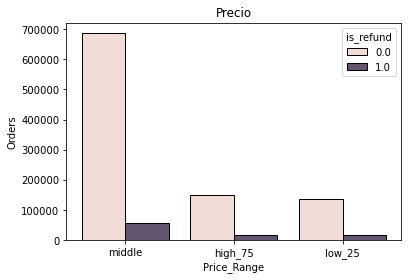

In [44]:
sns.histplot(
            data=df_1,
            x="Price_Range",
            hue="is_refund",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

# Base on the STD_Range

## Create DF STD

In [45]:
df_std = df_des[['CTLG_PROD_ID','mean']]
df_std['STDx1'] = df_des['std']
df_std['STDx1.25'] = df_des['std']*1.25
df_std['STDx1.5'] = df_des['std']*1.5
df_std['STDx1.75'] = df_des['std']*1.75
df_std['STDx2'] = df_des['std']*2
df_std['STDx2.25'] = df_des['std']*2.25
df_std['STDx2.5'] = df_des['std']*2.5
df_std['STDx2.75'] = df_des['std']*2.75
df_std['STDx3'] = df_des['std']*3
df_std=df_std.round(decimals=2)

<ipython-input-45-01a83c4a6b8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['STDx1'] = df_des['std']
<ipython-input-45-01a83c4a6b8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_std['STDx1.25'] = df_des['std']*1.25
<ipython-input-45-01a83c4a6b8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [46]:
df_std.sample(5)

,CTLG_PROD_ID,mean,STDx1,STDx1.25,STDx1.5,STDx1.75,STDx2,STDx2.25,STDx2.5,STDx2.75,STDx3
11260,17325068,44.92,1.59,1.99,2.39,2.79,3.19,3.59,3.98,4.38,4.78
6347,15233905,36.37,2.19,2.74,3.29,3.83,4.38,4.93,5.48,6.03,6.57
2674,9143184,36.67,2.72,3.39,4.07,4.75,5.43,6.11,6.79,7.47,8.15
10160,16092466,807.26,118.56,148.20,177.84,207.48,237.12,266.76,296.40,326.04,355.69
6785,15273175,92.13,13.63,17.04,20.45,23.85,27.26,30.67,34.08,37.48,40.89


In [47]:
df.columns

Index(['CTLG_PROD_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%',
       'max', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'active_item', 'flag_bad_user', 'is_buybox', 'has_bpp',
       'has_claim_seller', 'is_refund', 'bpp_cashout_final', 'bad_order',
       'Low25_Price', 'Middle_Price', 'High75_Price', 'Price_Range'],
      dtype='object')

## Join the DF STD with the rest of the info

In [48]:
df_red = df[['CTLG_PROD_ID','ORD_ORDER_ID','ITE_ITEM_ID','ITE_BASE_CURRENT_PRICE','flag_bad_user','has_bpp','has_claim_seller','is_refund','bpp_cashout_final','bad_order']]
df_s = pd.merge(left = df_red, right = df_std,
                how = 'inner',
                left_on='CTLG_PROD_ID', right_on='CTLG_PROD_ID')

In [49]:
df_s.sample(5)

,CTLG_PROD_ID,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order,mean,STDx1,STDx1.25,STDx1.5,STDx1.75,STDx2,STDx2.25,STDx2.5,STDx2.75,STDx3
50405,6125042,4624772049,1906001115,78.12,0,0,0,0.0,0.0,0,63.85,19.81,24.76,29.71,34.66,39.61,44.56,49.51,54.47,59.42
284826,11547168,4667905835,1690857566,25.19,0,0,0,0.0,0.0,0,28.52,6.13,7.67,9.20,10.73,12.27,13.80,15.33,16.87,18.40
538958,15379881,4665328277,1872642538,4.36,0,0,0,0.0,0.0,0,4.43,1.21,1.51,1.81,2.11,2.41,2.71,3.01,3.31,3.62
931128,16479676,4622313542,1817414175,30.54,0,0,0,0.0,0.0,0,24.50,4.86,6.08,7.30,8.51,9.73,10.94,12.16,13.38,14.59
617747,15707176,4661391965,1811469533,136.12,0,0,0,0.0,0.0,0,134.94,11.07,13.83,16.60,19.37,22.13,24.90,27.67,30.44,33.20


In [50]:
df_s.columns

Index(['CTLG_PROD_ID', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'has_bpp', 'has_claim_seller', 'is_refund',
       'bpp_cashout_final', 'bad_order', 'mean', 'STDx1', 'STDx1.25',
       'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25', 'STDx2.5', 'STDx2.75',
       'STDx3'],
      dtype='object')

## Create column flag below STD

In [51]:
df_s['media-1std'] = df_s['mean'] - df_s['STDx1']
df_s['media-1.25std'] = df_s['mean'] - df_s['STDx1.25']
df_s['media-1.5std'] = df_s['mean'] - df_s['STDx1.5']
df_s['media-1.75std'] = df_s['mean'] - df_s['STDx1.75']
df_s['media-2std'] = df_s['mean'] - df_s['STDx2']
df_s['media-2.25std'] = df_s['mean'] - df_s['STDx2.25']
df_s['media-2.5std'] = df_s['mean'] - df_s['STDx2.5']
df_s['media-2.75std'] = df_s['mean'] - df_s['STDx2.75']
df_s['media-3std'] = df_s['mean'] - df_s['STDx3']

In [52]:
df_s['Low_1STD'] = df_s.apply(lambda x: 1 if x['media-1std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.25STD'] = df_s.apply(lambda x: 1 if x['media-1.25std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.5STD'] = df_s.apply(lambda x: 1 if x['media-1.5std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_1.75STD'] = df_s.apply(lambda x: 1 if x['media-1.75std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2STD'] = df_s.apply(lambda x: 1 if x['media-2std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.25STD'] = df_s.apply(lambda x: 1 if x['media-2.25std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.5STD'] = df_s.apply(lambda x: 1 if x['media-2.5std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_2.75STD'] = df_s.apply(lambda x: 1 if x['media-2.75std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['Low_3STD'] = df_s.apply(lambda x: 1 if x['media-3std'] > x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag over STD

In [53]:
df_s['media+1std'] = df_s['mean'] + df_s['STDx1']
df_s['media+1.25std'] = df_s['mean'] + df_s['STDx1.25']
df_s['media+1.5std'] = df_s['mean'] + df_s['STDx1.5']
df_s['media+1.75std'] = df_s['mean'] + df_s['STDx1.75']
df_s['media+2std'] = df_s['mean'] + df_s['STDx2']
df_s['media+2.25std'] = df_s['mean'] + df_s['STDx2.25']
df_s['media+2.5std'] = df_s['mean'] + df_s['STDx2.5']
df_s['media+2.75std'] = df_s['mean'] + df_s['STDx2.75']
df_s['media+3std'] = df_s['mean'] + df_s['STDx3']

In [54]:
df_s['High_1STD'] = df_s.apply(lambda x: 1 if x['media+1std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.25STD'] = df_s.apply(lambda x: 1 if x['media+1.25std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.5STD'] = df_s.apply(lambda x: 1 if x['media+1.5std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_1.75STD'] = df_s.apply(lambda x: 1 if x['media+1.75std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2STD'] = df_s.apply(lambda x: 1 if x['media+2std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.25STD'] = df_s.apply(lambda x: 1 if x['media+2.25std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.5STD'] = df_s.apply(lambda x: 1 if x['media+2.5std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_2.75STD'] = df_s.apply(lambda x: 1 if x['media+2.75std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)
df_s['High_3STD'] = df_s.apply(lambda x: 1 if x['media+3std'] < x['ITE_BASE_CURRENT_PRICE'] else 0, axis=1)

## Create column flag STD_range

In [55]:
df_s['1STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1STD']== 1 else('high_STD' if  x['High_1STD']==1  else 'middle_STD'),axis=1)
df_s['1.25STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.25STD']== 1 else('high_STD' if  x['High_1.25STD']==1  else 'middle_STD'),axis=1)
df_s['1.5STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.5STD']== 1 else('high_STD' if  x['High_1.5STD']==1  else 'middle_STD'),axis=1)
df_s['1.75STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_1.75STD']== 1 else('high_STD' if  x['High_1.75STD']==1  else 'middle_STD'),axis=1)
df_s['2STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2STD']== 1 else('high_STD' if  x['High_2STD']==1  else 'middle_STD'),axis=1)
df_s['2.25STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.25STD']== 1 else('high_STD' if  x['High_2.25STD']==1  else 'middle_STD'),axis=1)
df_s['2.5STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.5STD']== 1 else('high_STD' if  x['High_2.5STD']==1  else 'middle_STD'),axis=1)
df_s['2.75STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_2.75STD']== 1 else('high_STD' if  x['High_2.75STD']==1  else 'middle_STD'),axis=1)
df_s['3STD_Range'] = df_s.apply(lambda x:'low_STD' if x['Low_3STD']== 1 else('high_STD' if  x['High_3STD']==1  else 'middle_STD'),axis=1)


In [56]:
df_s.columns

Index(['CTLG_PROD_ID', 'ORD_ORDER_ID', 'ITE_ITEM_ID', 'ITE_BASE_CURRENT_PRICE',
       'flag_bad_user', 'has_bpp', 'has_claim_seller', 'is_refund',
       'bpp_cashout_final', 'bad_order', 'mean', 'STDx1', 'STDx1.25',
       'STDx1.5', 'STDx1.75', 'STDx2', 'STDx2.25', 'STDx2.5', 'STDx2.75',
       'STDx3', 'media-1std', 'media-1.25std', 'media-1.5std', 'media-1.75std',
       'media-2std', 'media-2.25std', 'media-2.5std', 'media-2.75std',
       'media-3std', 'Low_1STD', 'Low_1.25STD', 'Low_1.5STD', 'Low_1.75STD',
       'Low_2STD', 'Low_2.25STD', 'Low_2.5STD', 'Low_2.75STD', 'Low_3STD',
       'media+1std', 'media+1.25std', 'media+1.5std', 'media+1.75std',
       'media+2std', 'media+2.25std', 'media+2.5std', 'media+2.75std',
       'media+3std', 'High_1STD', 'High_1.25STD', 'High_1.5STD',
       'High_1.75STD', 'High_2STD', 'High_2.25STD', 'High_2.5STD',
       'High_2.75STD', 'High_3STD', '1STD_Range', '1.25STD_Range',
       '1.5STD_Range', '1.75STD_Range', '2STD_Range', '2.25STD_R

In [57]:
df_s.sample(5)

,CTLG_PROD_ID,ORD_ORDER_ID,ITE_ITEM_ID,ITE_BASE_CURRENT_PRICE,flag_bad_user,has_bpp,has_claim_seller,is_refund,bpp_cashout_final,bad_order,...,High_3STD,1STD_Range,1.25STD_Range,1.5STD_Range,1.75STD_Range,2STD_Range,2.25STD_Range,2.5STD_Range,2.75STD_Range,3STD_Range
978601,17324468,4675526208,1805084916,224.01,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
683773,15822731,4648912798,1697698126,532.51,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
440436,15199733,4651575256,1873367509,46.48,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
621647,15710800,4676847074,1795443866,5.86,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD
232186,9835136,4645548693,1528519157,13.48,0,0,0,0.0,0.0,0,...,0,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD


In [58]:
df_2=df_s[['1STD_Range','1.25STD_Range','1.5STD_Range','1.75STD_Range','2STD_Range','2.25STD_Range','2.5STD_Range','2.75STD_Range','3STD_Range','bad_order','ORD_ORDER_ID']]
df_2.sample(5)

,1STD_Range,1.25STD_Range,1.5STD_Range,1.75STD_Range,2STD_Range,2.25STD_Range,2.5STD_Range,2.75STD_Range,3STD_Range,bad_order,ORD_ORDER_ID
522859,low_STD,low_STD,low_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,1,4679380965
509318,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4613301465
925114,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,0,4656233120
1017762,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,1,4624257498
419005,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,middle_STD,1,4681017579


## Distribution Bad Orders by different STD segments

In [77]:
df_1=df_s[['1STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1STD_Range','ORD_ORDER_ID']].groupby(['1STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1STD_Range','TOTAL']]

ds_1 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1STD_Range', right_on='1STD_Range')

ds_1['Dis.[%]']=(ds_1['ORD_ORDER_ID']/ds_1['TOTAL'])*100
ds_1['Dis.[%]']=ds_1['Dis.[%]'].round(decimals=1)

ds_1=ds_1[ds_1['bad_order']==1]
#ds_1=ds_1[ds_1['1STD_Range']=='low_STD']

In [78]:
df_1=df_s[['1.25STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.25STD_Range','ORD_ORDER_ID']].groupby(['1.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.25STD_Range','TOTAL']]

ds_125 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.25STD_Range', right_on='1.25STD_Range')

ds_125['Dis.[%]']=(ds_125['ORD_ORDER_ID']/ds_125['TOTAL'])*100
ds_125['Dis.[%]']=ds_125['Dis.[%]'].round(decimals=1)

ds_125=ds_125[ds_125['bad_order']==1]
#ds_125=ds_125[ds_125['1.25STD_Range']=='low_STD']

In [79]:
df_1=df_s[['1.5STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.5STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.5STD_Range','ORD_ORDER_ID']].groupby(['1.5STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.5STD_Range','TOTAL']]

ds_15 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.5STD_Range', right_on='1.5STD_Range')

ds_15['Dis.[%]']=(ds_15['ORD_ORDER_ID']/ds_15['TOTAL'])*100
ds_15['Dis.[%]']=ds_15['Dis.[%]'].round(decimals=1)

ds_15=ds_15[ds_15['bad_order']==1]
#ds_15=ds_15[ds_15['1.5STD_Range']=='low_STD']

In [80]:
df_1=df_s[['1.75STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['1.75STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['1.75STD_Range','ORD_ORDER_ID']].groupby(['1.75STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['1.75STD_Range','TOTAL']]

ds_175 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='1.75STD_Range', right_on='1.75STD_Range')

ds_175['Dis.[%]']=(ds_175['ORD_ORDER_ID']/ds_175['TOTAL'])*100
ds_175['Dis.[%]']=ds_175['Dis.[%]'].round(decimals=1)

ds_175=ds_175[ds_175['bad_order']==1]
#ds_175=ds_175[ds_175['1.75STD_Range']=='low_STD']

In [81]:
df_1=df_s[['2STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2STD_Range','ORD_ORDER_ID']].groupby(['2STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2STD_Range','TOTAL']]

ds_2 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2STD_Range', right_on='2STD_Range')

ds_2['Dis.[%]']=(ds_2['ORD_ORDER_ID']/ds_2['TOTAL'])*100
ds_2['Dis.[%]']=ds_2['Dis.[%]'].round(decimals=1)

ds_2=ds_2[ds_2['bad_order']==1]
#ds_2=ds_2[ds_2['2STD_Range']=='low_STD']

In [82]:
df_1=df_s[['2.25STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

ds_225 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

ds_225['Dis.[%]']=(ds_225['ORD_ORDER_ID']/ds_225['TOTAL'])*100
ds_225['Dis.[%]']=ds_225['Dis.[%]'].round(decimals=1)

ds_225=ds_225[ds_225['bad_order']==1]
#ds_225=ds_225[ds_225['2.25STD_Range']=='low_STD']

In [83]:
df_1=df_s[['2.5STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.5STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.5STD_Range','ORD_ORDER_ID']].groupby(['2.5STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.5STD_Range','TOTAL']]

ds_25 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.5STD_Range', right_on='2.5STD_Range')

ds_25['Dis.[%]']=(ds_25['ORD_ORDER_ID']/ds_25['TOTAL'])*100
ds_25['Dis.[%]']=ds_25['Dis.[%]'].round(decimals=1)

ds_25=ds_25[ds_25['bad_order']==1]
#ds_25=ds_25[ds_25['2.5STD_Range']=='low_STD']

In [84]:
df_1=df_s[['2.75STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['2.75STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.75STD_Range','ORD_ORDER_ID']].groupby(['2.75STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.75STD_Range','TOTAL']]

ds_275 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.75STD_Range', right_on='2.75STD_Range')

ds_275['Dis.[%]']=(ds_275['ORD_ORDER_ID']/ds_275['TOTAL'])*100
ds_275['Dis.[%]']=ds_275['Dis.[%]'].round(decimals=1)

ds_275=ds_275[ds_275['bad_order']==1]
#ds_275=ds_275[ds_275['2.75STD_Range']=='low_STD']

In [85]:
df_1=df_s[['3STD_Range','bad_order','ORD_ORDER_ID']]
gb1=df_1.groupby(['3STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['3STD_Range','ORD_ORDER_ID']].groupby(['3STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['3STD_Range','TOTAL']]

ds_3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='3STD_Range', right_on='3STD_Range')

ds_3['Dis.[%]']=(ds_3['ORD_ORDER_ID']/ds_3['TOTAL'])*100
ds_3['Dis.[%]']=ds_3['Dis.[%]'].round(decimals=1)

ds_3=ds_3[ds_3['bad_order']==1]
#ds_3=ds_3[ds_3['3STD_Range']=='low_STD']

In [86]:
ds_1

,1STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,13956,99457,14.0
3,low_STD,1,14832,75086,19.8
5,middle_STD,1,114593,890185,12.9


In [87]:
ds_125

,1.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,10332,72816,14.2
3,low_STD,1,9192,43070,21.3
5,middle_STD,1,123857,948842,13.1


In [88]:
ds_15

,1.5STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,7878,54621,14.4
3,low_STD,1,5948,25302,23.5
5,middle_STD,1,129555,984805,13.2


In [89]:
ds_175

,1.75STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,6094,40871,14.9
3,low_STD,1,4256,15865,26.8
5,middle_STD,1,133031,1007992,13.2


In [90]:
ds_2

,2STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,4826,31508,15.3
3,low_STD,1,3118,10684,29.2
5,middle_STD,1,135437,1022536,13.2


In [91]:
ds_225

,2.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,3873,24082,16.1
3,low_STD,1,2426,7214,33.6
5,middle_STD,1,137082,1033432,13.3


In [92]:
ds_25

,2.5STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,3196,19030,16.8
3,low_STD,1,2003,5427,36.9
5,middle_STD,1,138182,1040271,13.3


In [93]:
ds_275

,2.75STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,2721,15131,18.0
3,low_STD,1,1679,4326,38.8
5,middle_STD,1,138981,1045271,13.3


In [94]:
ds_3

,3STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
1,high_STD,1,2408,12398,19.4
3,low_STD,1,1424,3395,41.9
5,middle_STD,1,139549,1048935,13.3


## Distribution Bad Orders

In [95]:
df_1=df_s[['2.25STD_Range','bad_order','ORD_ORDER_ID']]

In [96]:
gb1=df_1.groupby(['2.25STD_Range','bad_order']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,bad_order,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,20209,24082,83.9
1,high_STD,1,3873,24082,16.1
2,low_STD,0,4788,7214,66.4
3,low_STD,1,2426,7214,33.6
4,middle_STD,0,896350,1033432,86.7
5,middle_STD,1,137082,1033432,13.3


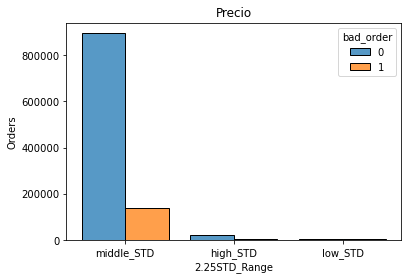

In [97]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="bad_order",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Bad Users

In [98]:
df_1=df_s[['2.25STD_Range','flag_bad_user','ORD_ORDER_ID']]

In [99]:
gb1=df_1.groupby(['2.25STD_Range','flag_bad_user']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,flag_bad_user,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,23119,24082,96.0
1,high_STD,1,963,24082,4.0
2,low_STD,0,6888,7214,95.5
3,low_STD,1,326,7214,4.5
4,middle_STD,0,999358,1033432,96.7
5,middle_STD,1,34074,1033432,3.3


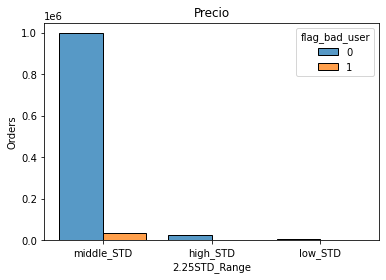

In [100]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="flag_bad_user",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has CashOut

In [101]:
df_1=df_s[['2.25STD_Range','bpp_cashout_final','ORD_ORDER_ID']]
df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)
df_1=df_1[['2.25STD_Range','has_co','ORD_ORDER_ID']]

<ipython-input-101-3a510db3b053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['has_co'] = df_1.apply(lambda x: 1 if x['bpp_cashout_final'] > 0 else 0, axis=1)


In [102]:
gb1=df_1.groupby(['2.25STD_Range','has_co']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,has_co,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,23887,24082,99.2
1,high_STD,1,195,24082,0.8
2,low_STD,0,7128,7214,98.8
3,low_STD,1,86,7214,1.2
4,middle_STD,0,1027546,1033432,99.4
5,middle_STD,1,5886,1033432,0.6


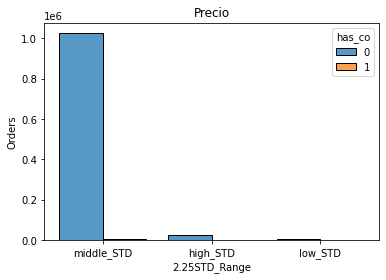

In [103]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="has_co",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution Has Claim

In [104]:
df_1=df_s[['2.25STD_Range','has_claim_seller','ORD_ORDER_ID']]

In [105]:
gb1=df_1.groupby(['2.25STD_Range','has_claim_seller']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,has_claim_seller,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0,21563,24082,89.5
1,high_STD,1,2519,24082,10.5
2,low_STD,0,5449,7214,75.5
3,low_STD,1,1765,7214,24.5
4,middle_STD,0,943906,1033432,91.3
5,middle_STD,1,89526,1033432,8.7


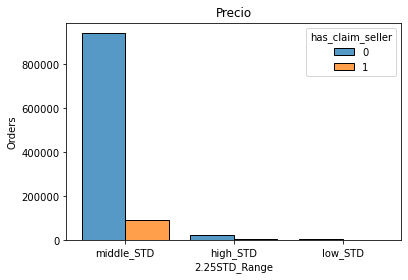

In [106]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="has_claim_seller",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Distribution is Refund

In [107]:
df_1=df_s[['2.25STD_Range','is_refund','ORD_ORDER_ID']]

In [108]:
gb1=df_1.groupby(['2.25STD_Range','is_refund']).count()
gb1=gb1.reset_index()

gb2=gb1[['2.25STD_Range','ORD_ORDER_ID']].groupby(['2.25STD_Range']).sum()
gb2=gb2.reset_index()
gb2['TOTAL']=gb2['ORD_ORDER_ID']
gb2=gb2[['2.25STD_Range','TOTAL']]

gb3 = pd.merge(left = gb1, right = gb2,
                how = 'inner',
                left_on='2.25STD_Range', right_on='2.25STD_Range')

gb3['Dis.[%]']=(gb3['ORD_ORDER_ID']/gb3['TOTAL'])*100
gb3['Dis.[%]']=gb3['Dis.[%]'].round(decimals=1)

gb3

,2.25STD_Range,is_refund,ORD_ORDER_ID,TOTAL,Dis.[%]
0,high_STD,0.0,21528,24082,89.4
1,high_STD,1.0,2554,24082,10.6
2,low_STD,0.0,5140,7211,71.3
3,low_STD,1.0,2071,7211,28.7
4,middle_STD,0.0,947055,1033418,91.6
5,middle_STD,1.0,86363,1033418,8.4


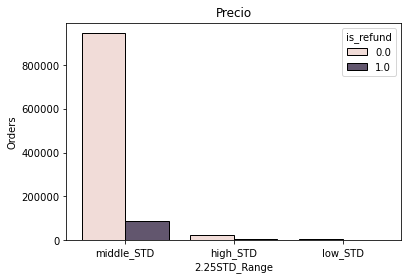

In [109]:
sns.histplot(
            data=df_1,
            x="2.25STD_Range",
            hue="is_refund",
            multiple="dodge",
            shrink=.8
            ).set(title='Precio',ylabel='Orders');

## Export the products IDs

In [ ]:
#ID=df['CTLG_PROD_ID']
#ID.to_csv(r'products_id.csv', index = False)

In [ ]:
#LAMBDA CON AND
#df_ratios['extremos']= df_ratios.apply(lambda x: 'caso1' if x['ratio_recla_1m']> 0.3 and x['ratio_cashout_1m']> 0.3 and x['ratio_ref_1m']> 0.3 and x['ratio_claims_1m']> 0.3 else 'no',axis=1)


In [ ]:
#LAMDA CON IF ANIDADO
#df['adicionales']= df.apply(lambda x: 'caso1' if x['gmv_90d']<= 0 else('caso2' if  x['gmv_30d']<=0  else 'no'),axis=1)
